## Demo: Forcasting Stock Performance in Our Portfolio

This program retrieves stock price data using the Alpaca API and then simulates future performance using Monte Carlo Simulation.

Let's pretend that we are looking to add Microsoft (MSFT) and Coca-Cola (KO) stock to our portfolio. If we were to invest $10,000 worth of stock today, how much would it be worth in 5 years? 10 years? Let's find out.

After importing our dependencies and setting up the Alpaca API instance, our next step is to query the Alpaca API to retrieve the closing stock price of Microsoft and Coca-Cola over the past 3 years.

### Import Dependencies

In [1]:
# Import libraries and dependencies
import os
import pandas as pd
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

In [2]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv("newkeys.env")

True

In [3]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

### Get Past 3 Year's Worth of Microsoft and Coca-Cola Stock Price Data via Alpaca API Call

In [4]:
# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes between now and 3 years ago.
start_date = pd.Timestamp("2017-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-05-01", tz="America/New_York").isoformat()

# Set the ticker information
tickers = ["MSFT","KO"]

# Get 3 year's worth of historical price data for Microsoft and Coca-Cola
df_ticker = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Display sample data
df_ticker.head()

KO                                    MSFT  \
                            open    high    low   close    volume   open   
time                                                                       
2017-05-01 00:00:00-04:00  43.15  43.500  43.10  43.230  11470244  68.67   
2017-05-02 00:00:00-04:00  43.22  43.440  43.16  43.380   9733052  69.71   
2017-05-03 00:00:00-04:00  43.33  43.485  43.15  43.315   8712620  69.38   
2017-05-04 00:00:00-04:00  43.42  43.810  43.40  43.660   8638866  69.03   
2017-05-05 00:00:00-04:00  43.79  43.840  43.56  43.680   6678133  68.90   

                                                           
                            high     low  close    volume  
time                                                       
2017-05-01 00:00:00-04:00  69.55  68.500  69.43  27119635  
2017-05-02 00:00:00-04:00  69.71  69.130  69.30  19179268  
2017-05-03 00:00:00-04:00  69.38  68.710  69.08  24576064  
2017-05-04 00:00:00-04:00  69.08  68.640  68.81  18561598  
2017-05-05 00:00:00-04:00  69.03  68.485  68.99  15644971

### The MCForecastTools Library at a Glance

If we look at the index of our DataFrame, we can see that we correctly queried daily stock price from May of 2017 through May of 2020. Now that we have the historical stock information, it is time to build our Monte Carlo simulation instance. Let's take a look at the documentation of the MCSimulation module of the MCForecastTools library by executing the following command in our notebook:

In [5]:
# Print the documentation of the MCSimulation module of the MCForecastTools library
?MCSimulation

Init signature:
MCSimulation(
    portfolio_data,
    weights='',
    num_simulation=1000,
    num_trading_days=252,
)
Docstring:     
A Python class for runnning Monte Carlo simulation on portfolio price data. 

...

Attributes
----------
portfolio_data : pandas.DataFrame
    portfolio dataframe
weights: list(float)
    portfolio investment breakdown
nSim: int
    number of samples in simulation
nTrading: int
    number of trading days to simulate
simulated_return : pandas.DataFrame
    Simulated data from Monte Carlo
confidence_interval : pandas.Series
    the 95% confidence intervals for simulated final cumulative returns
    
Init docstring:
Constructs all the necessary attributes for the MCSimulation object.

Parameters
----------
portfolio_data: pandas.DataFrame
    DataFrame containing stock price information from Alpaca API
weights: list(float)
    A list fractions representing percentage of total investment per stock. DEFAULT: Equal distribution
num_simulation: int
    Number 

* The `MCSimulation` module contains multiple functions and parameters that help us easily configure, run, and evaluate a Monte Carlo simulation using the stock information we previously queried from Alpaca.

* According to the documentation, the `MCSimulation` module requires us to provide a few parameters to configure it properly:

  * **portfolio_data** - our Pandas DataFrame containing historical stock information from our *potential* stock portfolio.

  * **weights** - a list of weights that tell the `MCSimulation` what percentage of our investment goes to each stock.

    * For example, if `weights = [.75,.25]`, than the `MCSimulation` assumes that $7,500 of our $10,000 investment will go to Coca-Cola stock, while $2,500 will go to Microsoft stock.

  * **num_simulation** - the number of simulated samples we want to create.

    * At a minimum, we should try to use `500` samples. However, if we have the computational resources and time, we should try to simulate `1000` samples to ensure that our analysis results are more reliable.

  * **num_trading_days** - the number of trading days to simulate

    * For example, if we wanted to simulate stock price returns after `5` years, we need to multiply 252 (the number of trading days in a year) times five (`252*5`).


### Simulate five year portfolio growth using Monte Carlo simulation

Knowing this information, let's try to create our first instance of MCSimulation using a 60/40 split of our 10,000 investment (0.6 of our $10,000 for buying Coca-Cola stock, 0.4 for buying Microsoft stock):

In [6]:
# Configuring a Monte Carlo simulation to forecast five years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*5
)

After creating the MCSimulation instance, the daily returns are computed. A new DataFrame is created where the instance automatically created a daily_return column that calculates the percent change of closing prices for each stock. The daily_return column will be the normally distributed variable we use as input for the Monte Carlo simulation. We can look at this new DataFrame using the portfolio_data attribute and linking it to the head() function.

In [7]:
# Printing the simulation input data
MC_fiveyear.portfolio_data.head()

KO                                   \
                            open    high    low   close    volume   
time                                                                
2017-05-01 00:00:00-04:00  43.15  43.500  43.10  43.230  11470244   
2017-05-02 00:00:00-04:00  43.22  43.440  43.16  43.380   9733052   
2017-05-03 00:00:00-04:00  43.33  43.485  43.15  43.315   8712620   
2017-05-04 00:00:00-04:00  43.42  43.810  43.40  43.660   8638866   
2017-05-05 00:00:00-04:00  43.79  43.840  43.56  43.680   6678133   

                                         MSFT                                  \
                          daily_return   open   high     low  close    volume   
time                                                                            
2017-05-01 00:00:00-04:00          NaN  68.67  69.55  68.500  69.43  27119635   
2017-05-02 00:00:00-04:00     0.003470  69.71  69.71  69.130  69.30  19179268   
2017-05-03 00:00:00-04:00    -0.001498  69.38  69.38  68.710  69.08  24576064   
2017-05-04 00:00:00-04:00     0.007965  69.03  69.08  68.640  68.81  18561598   
2017-05-05 00:00:00-04:00     0.000458  68.90  69.03  68.485  68.99  15644971   

                                        
                          daily_return  
time                                    
2017-05-01 00:00:00-04:00          NaN  
2017-05-02 00:00:00-04:00    -0.001872  
2017-05-03 00:00:00-04:00    -0.003175  
2017-05-04 00:00:00-04:00    -0.003909  
2017-05-05 00:00:00-04:00     0.002616

Using our MCSimulation instance, we can run the Monte Carlo simulation using the calc_cumulative_return() function.

In [8]:
# Running a Monte Carlo simulation to forecast five years cumulative returns
MCSimulation.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.014644,1.017308,0.986577,0.991609,0.997665,1.003110,1.003296,0.991547,0.999002,0.998155,...,0.982413,0.981965,0.985245,1.028829,0.989125,0.987669,0.991245,0.991800,1.023836,0.992887
2,1.021755,1.011533,0.997160,0.956821,1.005985,1.007040,1.008589,0.982481,0.999156,1.020038,...,0.981016,0.984756,0.989783,1.026445,0.983499,0.991113,0.980817,0.986747,1.015435,0.986452
3,1.023614,1.007331,0.997426,0.966324,1.007514,1.008349,1.010217,1.001378,0.991650,1.012456,...,0.993968,0.987325,1.001457,1.020486,0.985118,0.989272,0.970136,1.002052,1.012115,0.982488
4,1.034965,1.016107,1.016283,0.964289,1.016509,1.020061,1.014637,1.010922,0.996899,1.022472,...,0.976312,0.988835,1.005186,1.035292,0.969247,0.997832,0.958197,0.996967,0.993386,0.985250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.902945,1.682793,1.726342,1.490388,2.836325,1.798218,1.010821,1.750991,0.851618,2.419473,...,1.305457,2.764508,2.639186,1.457037,1.311477,1.869112,1.920608,1.515175,1.700950,0.842333
1257,2.905068,1.645669,1.712420,1.491441,2.836379,1.804214,1.009012,1.750061,0.859561,2.366396,...,1.277057,2.720847,2.609780,1.466760,1.332811,1.880343,1.895824,1.521959,1.694171,0.845968
1258,2.836914,1.638304,1.702731,1.484690,2.855658,1.818515,0.992156,1.758393,0.879223,2.368788,...,1.260518,2.726793,2.597744,1.463297,1.349998,1.873289,1.940995,1.514019,1.727375,0.870695
1259,2.795557,1.629210,1.677031,1.476478,2.879796,1.839754,0.980769,1.724421,0.878463,2.357775,...,1.258942,2.707185,2.594695,1.448771,1.353389,1.846782,1.963241,1.511859,1.706438,0.875922


After running all the simulations, a new DataFrame is created.

At first glance, this DataFrame may not look like anything special, and that is okay. We want to check if the dimensions of the DataFrame make sense to confirm the simulation worked as intended. The 1261 rows represent our 252 trading days times 5 years (plus a starting value of 1), and the 500 columns represent the 500 simulated samples - it looks like the simulation ran correctly!

---

In order to visualize and analyze the data generated by the Monte Carlo simulation, we can use the other built-in functions of the MCSimulation module. First, we take a look at the 500 samples across the entire simulated time using the plot_simulation() function.

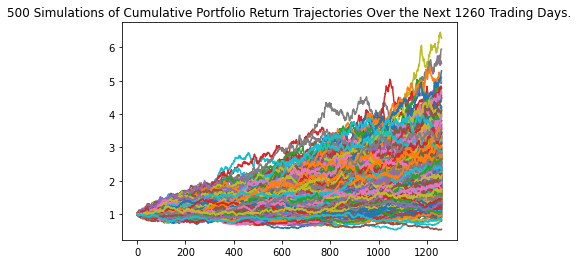

In [9]:
# Plot simulation outcomes
line_plot = MC_fiveyear.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_fiveyear_sim_plot.png", bbox_inches="tight")

The simulation process includes using a random number generator, so your simulated values will vary from this example. However, the functions in the code and the interpretations of the data will be the same.

Looking at our line plot, we see the trajectory of each and every sample across all of the simulated trading days. The x-axis of our plot shows the training days, while the y-axis is the portfolio's cumulative return. When we are looking at cumulative returns, a value of 1 indicates no change in the portfolio value.

According to our plot, we can see there are some cumulative returns of 2, 6, or even 12 times the original value, but it is hard for us to tell what the distribution of values looks like from this perspective. Alternatively, we can look at the distribution of cumulative returns using the plot_distribution() function.

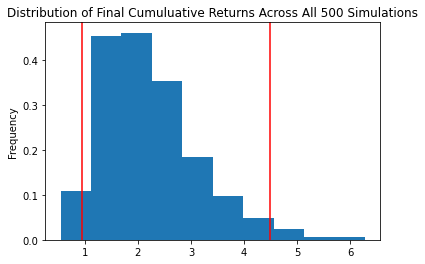

In [10]:
# Plot probability distribution and confidence intervals
dist_plot = MC_fiveyear.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_fiveyear_dist_plot.png',bbox_inches='tight')

Our new plot visualizes the final cumulative return across all the 500 simulated samples using a histogram. In this plot, our x-axis represents the final cumulative return values. In contrast, the y-axis represents the frequency of each "bin" of final cumulative values out of the total 500 simulations.

The red bars in this plot help us to visualize the 95% confidence interval. The 95% confidence interval represents the range of values we can expect to observe 95% of the time. When it comes to our Monte Carlo simulations, we simulated a normal distribution; therefore the 95% confidence interval approximates that most of our simulated returns will come from the center of the bell curve rather than the far tail ends.

According to our plot, we can see that 95% of the time, we can expect a cumulative return of approximately one to seven times our original investment amount. To calculate these approximate returns directly, we can use the following code.

First, we compute the summary statistics from the Monte Carlo simulation results using the summarize_cumulative_return() function.

In [11]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              2.220253
std               0.906735
min               0.543903
25%               1.543086
50%               2.056711
75%               2.713793
max               6.274158
95% CI Lower      0.953712
95% CI Upper      4.489729
Name: 1260, dtype: float64


Next, we use the lower and upper 95% confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in Coca-Cola and Microsoft stocks.

In [12]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in Coca-Cola and Microsoft stocks
ci_lower = round(tbl[8]*10000,2)
ci_upper = round(tbl[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 5 years will end within in the range of $9537.12 and $44897.29


Looking at our calculated portfolio values, we see that there is a 95% chance that our investment will grow over the next 5 years at a fairly substantial rate. Although this is fantastic news, it is important to note that stocks have observed historical growth and volatility from 2017 to 2020. As a result, our input data (and subsequent probability distribution) may be overestimating the 95% confidence interval of final cumulative return when simulating data over a more extended period of time. Therefore a good rule of thumb is to query and provide 1 year of historical portfolio data for every 1 or 2 years of simulated data.


As you become more familiar with programming and running Monte Carlo simulations in Python, they can tweak the code provided in the MCForecastTools library to create more robust simulations and more powerful visualizations!